In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
x = df.iloc[:,:-1]
y = df.outcome

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 0)

# Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
y_pred = dt.predict(x_test)

# Evaluation

In [11]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [12]:
print(f"The training accuracy: {accuracy_score(y_train,dt.predict(x_train))}\nThe testing accuracy: {accuracy_score(y_test,y_pred)}")

The training accuracy: 0.9868131868131869
The testing accuracy: 0.9385964912280702


In [13]:
confusion_matrix(y_test,y_pred)

array([[62,  5],
       [ 2, 45]])

In [14]:
pd.crosstab(y_test,y_pred)

col_0,0,1
outcome,,
0,62,5
1,2,45


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.90      0.96      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



# Plotting the tree

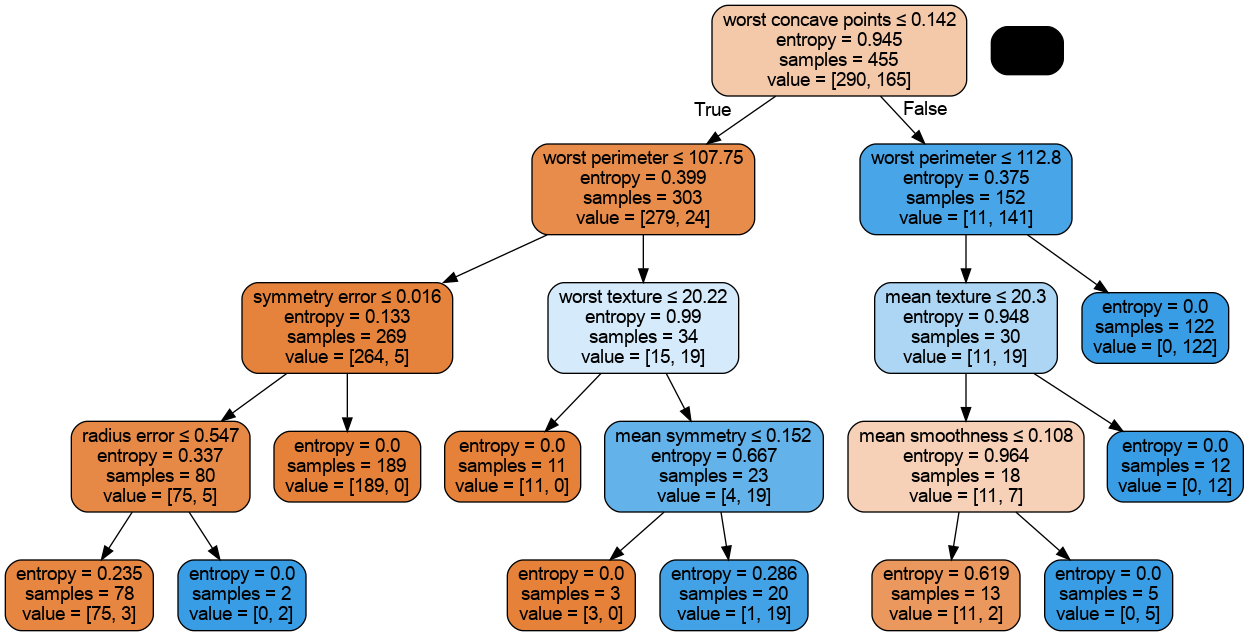

In [19]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
dot_data =StringIO()
export_graphviz(dt,out_file=dot_data,feature_names= x.columns,
                filled=True,rounded= True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())